In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
set.seed(2020)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# DSCI 100-002 Project Final Report: Predicting Playing Time on MineCraft Based on Age and Player Experience
---

**Date:** April 5th, 2025

**Group 32:** Christine Choi, Austin Hart, Katherine Hsu, Jack Yan

## Introduction
---

### Background
Minecraft, a sandbox video game developed by Mojang Studios and released in 2011, has become a global phenomenon, engaging millions of players across all age groups on its versatile platform. One key metric of engagement is the total hours players spend in the game, which can vary widely depending on individual player characteristics. For our research, we used data that was provided by plaicraft.ai, which is led by The Pacific Laboratory for Artificial Intelligence (PLAI), a research group from the Department of Computer Science at the University of British Columbia. 

### Research question
One of the broad questions that the researchers are interested in is knowing which "kinds" of players are most likely to contribute a large amount of data in order to target these players in their recruiting efforts. Specifically, the question we wanted to explore regarding this research objective is:

Can `Age` and `experience` predict `played_hours` in `players.csv`?

We chose the number of hours played as an outcome variable because the more time someone spends playing on the Minecraft server, the more their engagement is going to contribute to the recorded data. Moreover, we chose to look at age and experience as predictor variables because the combination of these two participant factors could help the researchers get a rough idea of the general audience to target in recruitment (e.g. teenagers that regularly play MineCraft).

### Description of dataset
The dataset that we used for this project is `players.csv`, which contains a total of 196 observations (i.e. information about 196 unique players). There are 7 variables which include:
- `experience` (character) - player's level of experience in the game (Beginner, Amateur, Regular, Pro, Veteran)
- `subscribe` (logical) - TRUE if player is subscribed to a game-related newsletter, FALSE if they are not subscribed
- `hashedEmail` (character) - player's email address scrambled into a unique code
- `played_hours` (double) - number of hours (to one decimal place) that the player has played the game
- `name` (character) - first name of the player
- `gender` (character) - player's gender (Male, Female, Non-binary, Prefer not to say, Agender, Two-spirited, Other)
- `Age` (double) - player's age as a number

For the purpose of our research question, the relevant columns are `Age`, `experience`, and `played_hours`. In the survey where the user fills out their personal information, those below the age of seven are unable to participate and the maximum age that someone can input is 99. Furthermore, level of experience was defined as:

1) Beginner - I'm completely new to Minecraft
2) Amateur - I've played a few hours of Minecraft
3) Regular - I regularly play Minecraft
4) Pro - I am experienced and pro Minecraft player
5) Veteran - Been here since the old days. (Before 2015)

Some visible issues in the data file include:
- Values in the `Age` column containing "NA" instead of a number which could be an issue for applying computations since not all values in the column are the same data type.
- `experience` and `gender` having character data types which should be converted to factors since they are both categorical variables with distinct values.

Other potential issues that we noticed include:
- Values in the `hashedEmail` column differing in length and including both numbers and letters, which could present a challenge for functions requiring indexing.
- Each observation in `hashedEmail`being a unique code which could present challenges for filtering by this variable.

### Loading the data

In [2]:
players <- read_csv('players.csv')

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Tidying & Wrangling

In [3]:
players_tidy <- players |>
    na.omit() |>
    mutate(
    experience = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur" ~ 2,
      experience == "Regular" ~ 3,
      experience == "Veteran" ~ 4,
      experience == "Pro" ~ 5),) |>
    mutate(played_minutes = played_hours * 60) |>
    # filter(6000 > played_minutes) |>
    select(experience, Age, played_minutes)
# players_tidy

### Summary Statistics

In [43]:
players_with_zero <- players_tidy |>
    filter(played_minutes == 0) |>
    count()
players_with_zero

n
<int>
85


In [44]:
players_over100 <- players_tidy |>
    filter(played_minutes > 6000) |>
    count()
players_over100

n
<int>
4


In [4]:
experience_playtime_means <- players_tidy |>
    group_by(experience) |>
    summarize(mean_player_minutes = mean(played_minutes))
experience_playtime_means

experience,mean_player_minutes
<dbl>,<dbl>
1,74.91429
2,361.04762
3,1123.54286
4,38.87500
5,167.07692


In [5]:
age_playtime_means <- players_tidy |>
    group_by(Age) |>
    summarize(mean_player_minutes = mean(played_minutes))
age_playtime_means

Age,mean_player_minutes
<dbl>,<dbl>
8,18.00000
9,1818.00000
10,216.00000
11,174.00000
12,30.00000
14,522.00000
15,6.00000
16,3002.00000
17,285.44000


In [6]:
experience_age_means <- players_tidy |>
    group_by(experience) |>
    summarize(mean_age = mean(Age))
experience_age_means

experience,mean_age
<dbl>,<dbl>
1,21.65714
2,20.25397
3,20.60000
4,20.95833
5,16.92308


### Exploratory Data Visualization

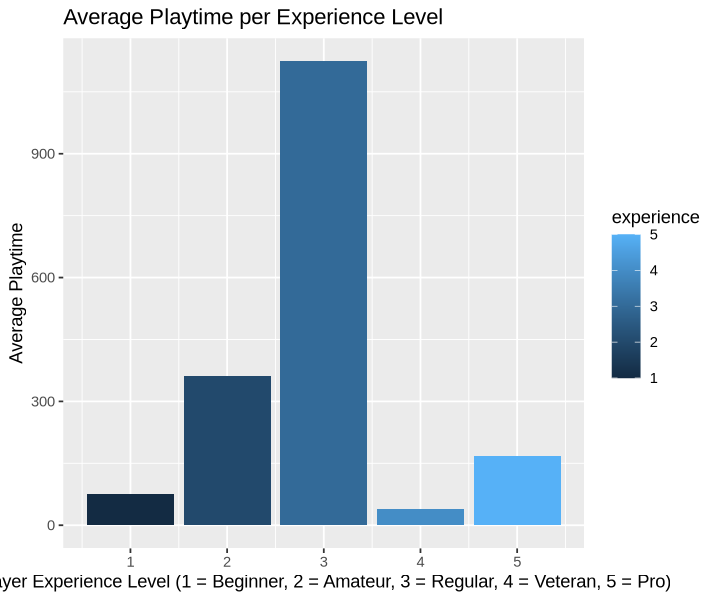

In [7]:
options(repr.plot.width = 6, repr.plot.height = 5)

experience_playtime_plot <- ggplot(experience_playtime_means, aes(x = experience, y = mean_player_minutes, fill = experience)) +
    geom_bar(stat = 'identity') +
    labs(x = 'Player Experience Level (1 = Beginner, 2 = Amateur, 3 = Regular, 4 = Veteran, 5 = Pro)', y = 'Average Playtime', title = 'Average Playtime per Experience Level')
experience_playtime_plot

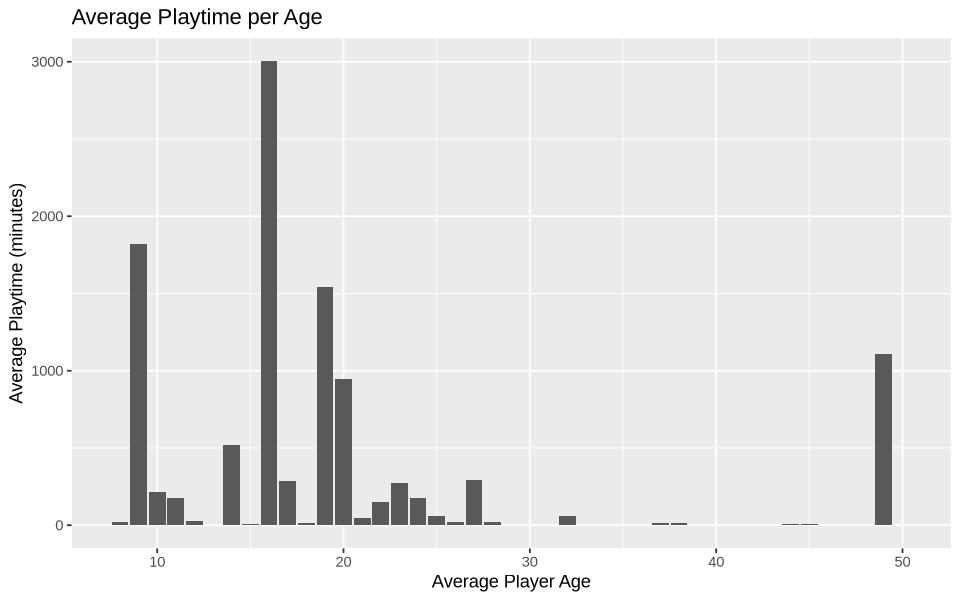

In [8]:
options(repr.plot.width = 8, repr.plot.height = 5)

age_playtime_plot <- ggplot(age_playtime_means, aes(x = Age, y = mean_player_minutes)) +
    geom_bar(stat = 'identity') +
    labs(x = 'Average Player Age', y = 'Average Playtime (minutes)', title = 'Average Playtime per Age')
age_playtime_plot

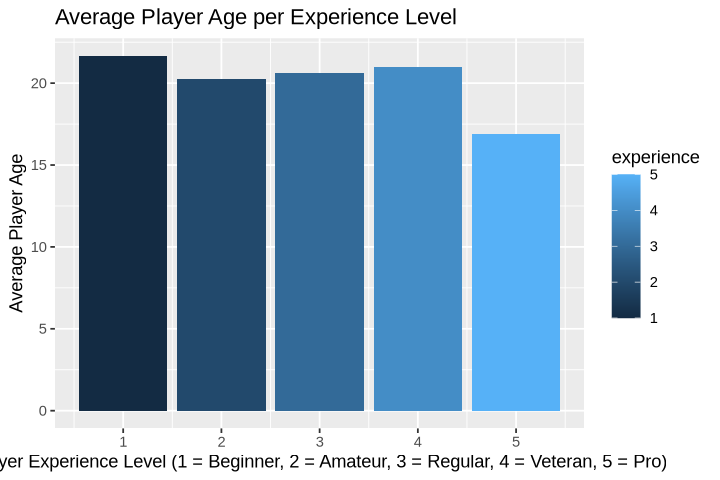

In [9]:
options(repr.plot.width = 6, repr.plot.height = 4)

experience_age_plot <- ggplot(experience_age_means, aes(x = experience, y = mean_age, fill = experience)) +
    geom_bar(stat = 'identity') +
    labs(x = 'Player Experience Level (1 = Beginner, 2 = Amateur, 3 = Regular, 4 = Veteran, 5 = Pro)', y = 'Average Player Age', title = 'Average Player Age per Experience Level')
experience_age_plot

## Methods
---
The method we used to analyze the hours played is K-nearest neighbour (KNN) regression. Since both the predictor (the players’ age) and predicted (hours played) are quantitative variables, this was the most appropriate in terms of prediction models. 

## Results
---

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rmse,standard,721.9759,5,274.9814,Preprocessor1_Model11


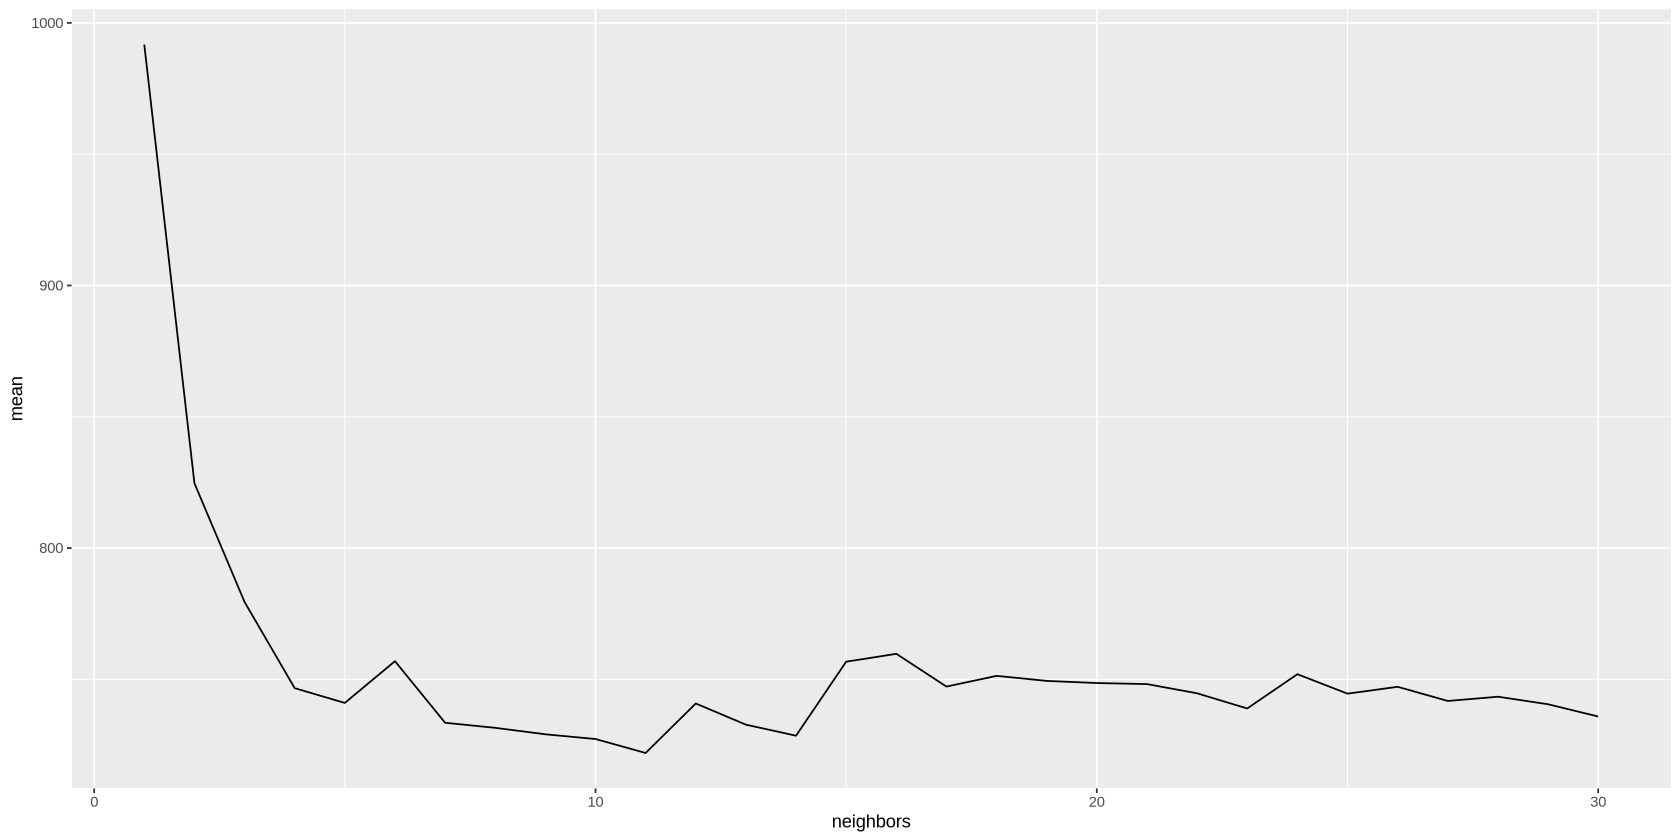

In [64]:
set.seed(2020)

players_split <- initial_split(players_tidy, prop = 0.75, strata = played_minutes)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(played_minutes ~ experience + Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec_tune <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
    set_engine('kknn') |>
    set_mode('regression')

players_vfold = vfold_cv(players_train, v = 5, strata = played_minutes)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec_tune)

gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

players_results <- players_workflow |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

players_min <- players_results |>
    filter(mean == min(mean))
players_min
tuneplot <- ggplot(players_results, aes(x = neighbors, y = mean)) +
    geom_line()
tuneplot

In [65]:
set.seed(2020)

players_spec <-  nearest_neighbor(weight_func = 'rectangular', neighbors = 11) |>
    set_engine('kknn') |>
    set_mode('regression')

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_train)

players_summary <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_minutes, estimate = .pred) |>
  filter(.metric == 'rmse')

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3089.235


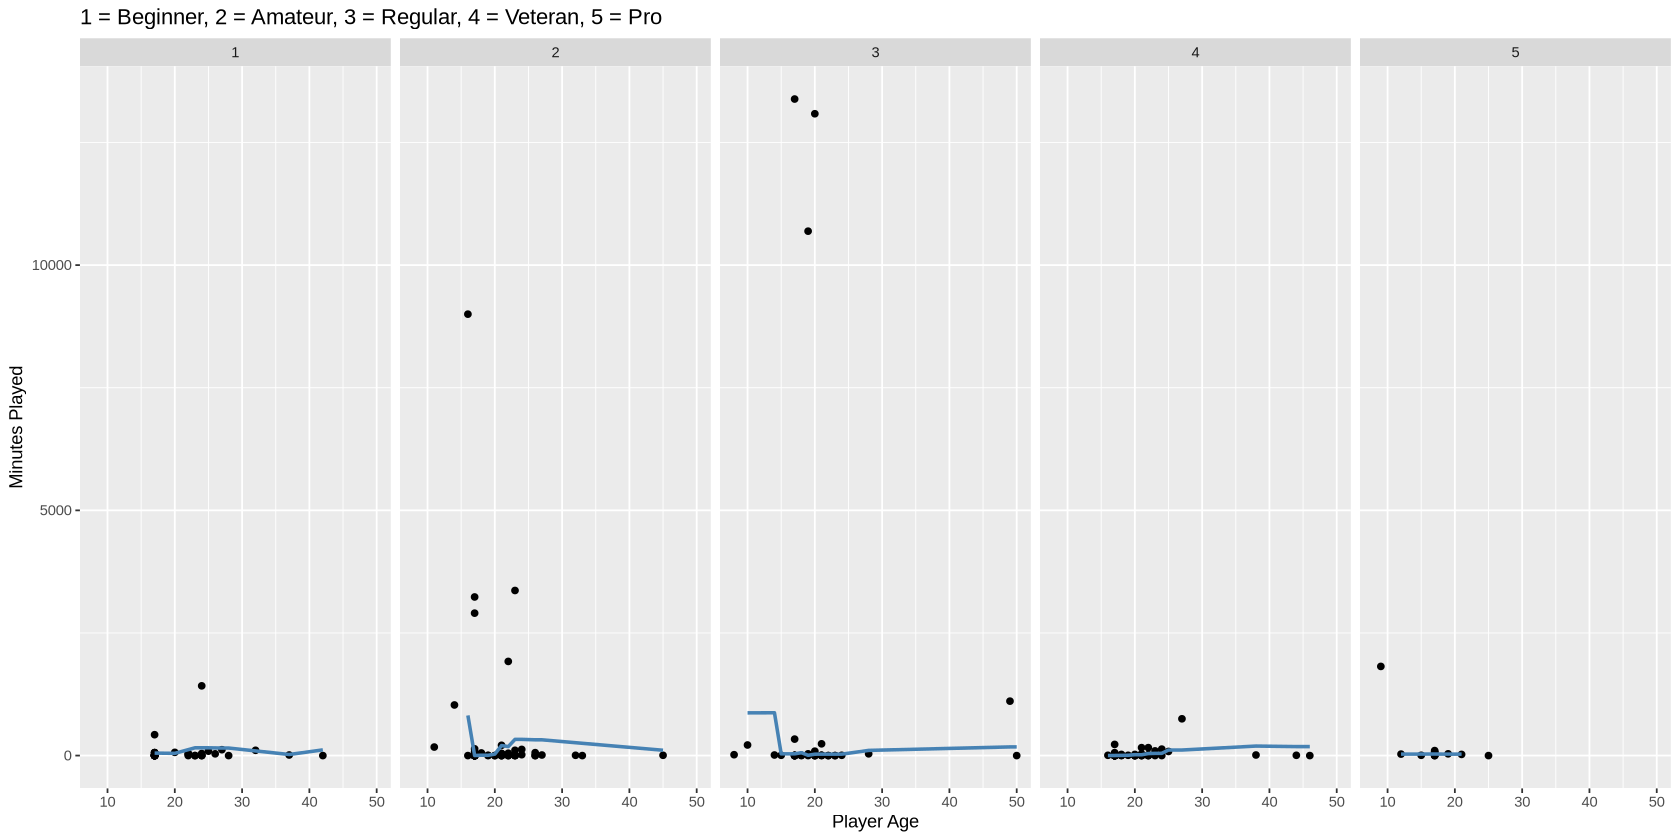

In [66]:
set.seed(2020)

players_preds <- predict(players_fit, players_train) |>
        bind_cols(players_train)

options(repr.plot.width = 14, repr.plot.height = 7)

players_plot <- ggplot(players_tidy, aes(x = Age, y = played_minutes)) +
  geom_point() +
  geom_line(data = players_preds,
            mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Player Age") +
  ylab("Minutes Played") +
    ggtitle('1 = Beginner, 2 = Amateur, 3 = Regular, 4 = Veteran, 5 = Pro')

players_plot + facet_wrap(~experience, ncol = 5)

Then, we repeated these calculations but with the outliers removed. We decided that an outlier would be a player who has played more than 100 hours (6000 minutes).

In [38]:
players_no_outliers <- players |>
    na.omit() |>
    mutate(
    experience = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur" ~ 2,
      experience == "Regular" ~ 3,
      experience == "Veteran" ~ 4,
      experience == "Pro" ~ 5),) |>
    mutate(played_minutes = played_hours * 60) |>
    filter(6000 > played_minutes) |>
    select(experience, Age, played_minutes)
# players_no_outliers

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,466.0611,5,128.6576,Preprocessor1_Model04


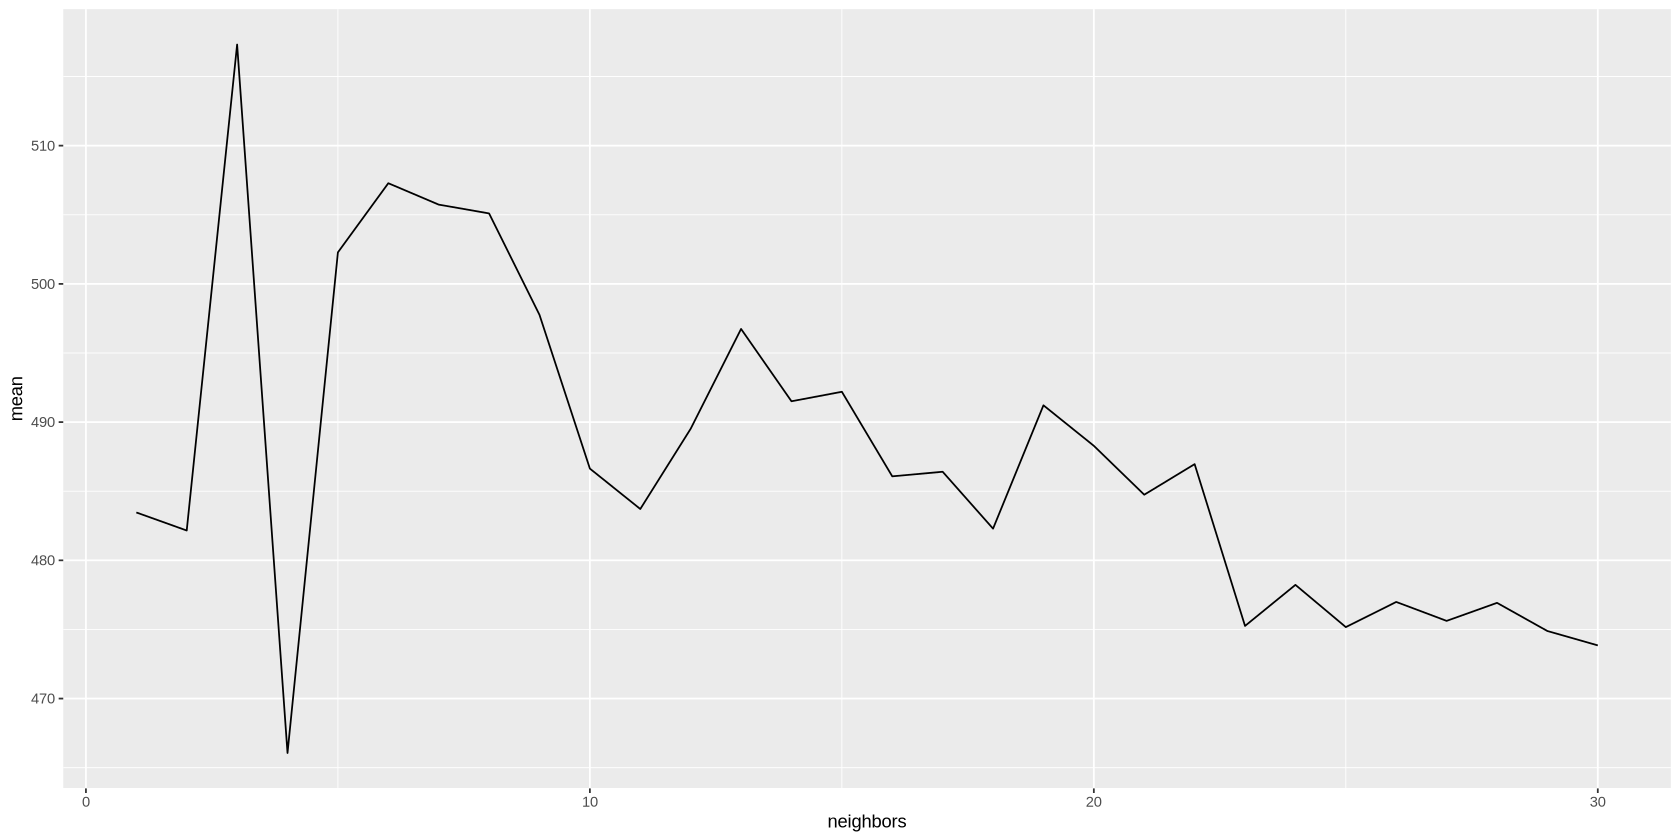

In [57]:
set.seed(2020)

players_split2 <- initial_split(players_no_outliers, prop = 0.75, strata = played_minutes)
players_train2 <- training(players_split2)
players_test2 <- testing(players_split2)

players_recipe2 <- recipe(played_minutes ~ experience + Age, data = players_train2) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec_tune2 <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
    set_engine('kknn') |>
    set_mode('regression')

players_vfold2 = vfold_cv(players_train2, v = 5, strata = played_minutes)

players_workflow2 <- workflow() |>
    add_recipe(players_recipe2) |>
    add_model(players_spec_tune2)

gridvals2 <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

players_results2 <- players_workflow2 |>
  tune_grid(resamples = players_vfold2, grid = gridvals2) |>
  collect_metrics() |>
  filter(.metric == "rmse")

players_min2 <- players_results2 |>
    filter(mean == min(mean))
players_min2

tuneplot2 <- ggplot(players_results2, aes(x = neighbors, y = mean)) +
    geom_line()
tuneplot2

In [58]:
set.seed(2020)

players_spec2 <-  nearest_neighbor(weight_func = 'rectangular', neighbors = 4) |>
    set_engine('kknn') |>
    set_mode('regression')

players_fit2 <- workflow() |>
    add_recipe(players_recipe2) |>
    add_model(players_spec2) |>
    fit(data = players_train2)

players_summary2 <- players_fit2 |>
  predict(players_test2) |>
  bind_cols(players_test2) |>
  metrics(truth = played_minutes, estimate = .pred) |>
  filter(.metric == 'rmse')

players_summary2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,281.3893


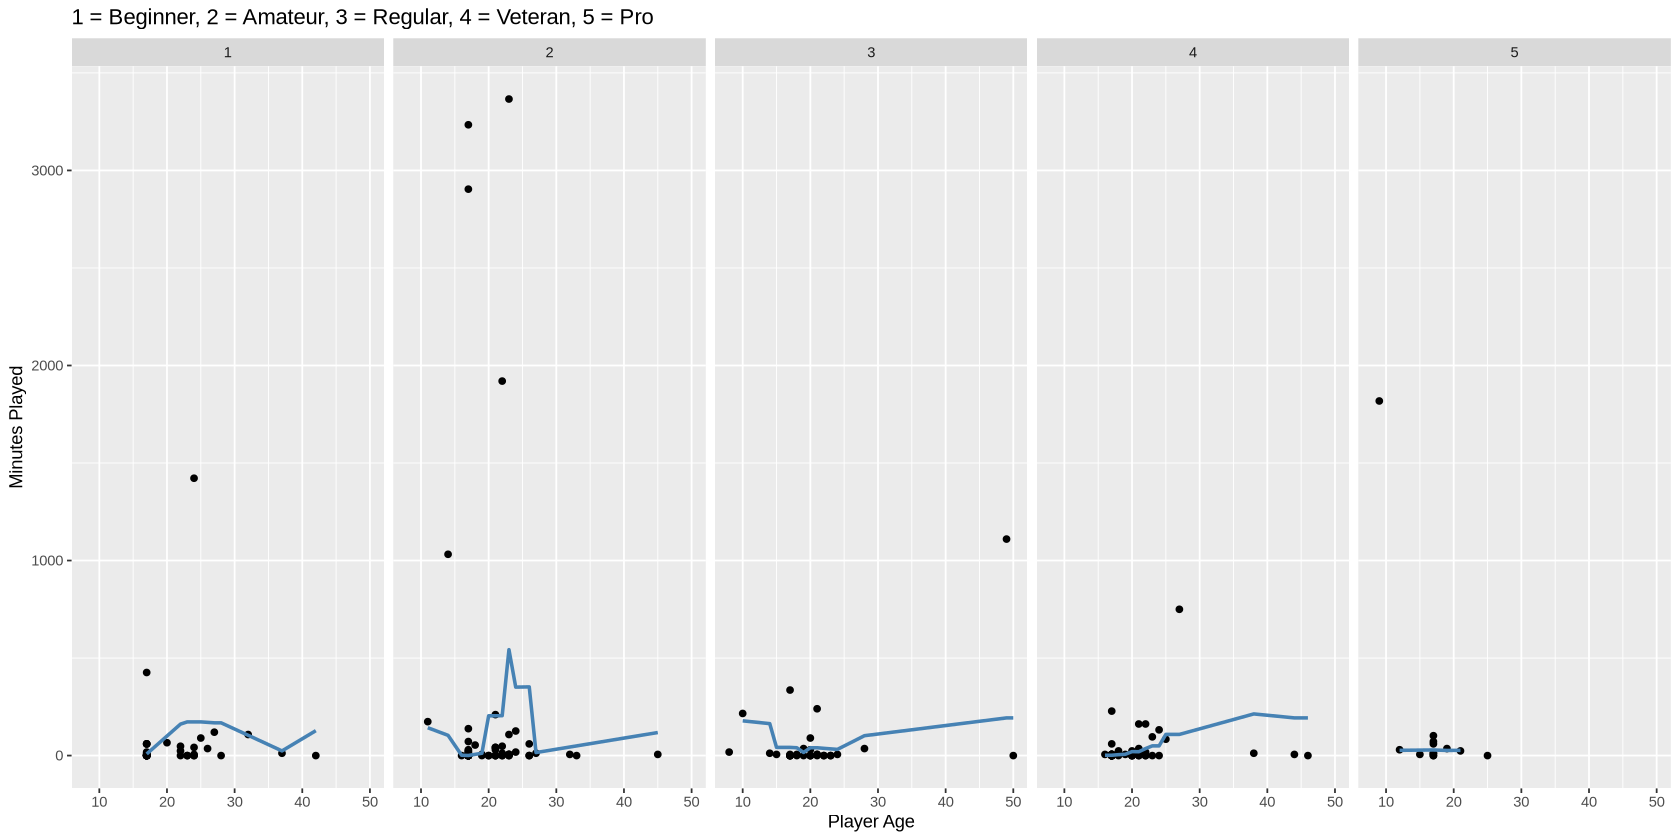

In [53]:
set.seed(2020)

players_preds2 <- predict(players_fit2, players_train2) |>
        bind_cols(players_train2)

options(repr.plot.width = 14, repr.plot.height = 7)

players_plot2 <- ggplot(players_no_outliers, aes(x = Age, y = played_minutes)) +
  geom_point() +
  geom_line(data = players_preds2,
            mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Player Age") +
  ylab("Minutes Played") +
    ggtitle('1 = Beginner, 2 = Amateur, 3 = Regular, 4 = Veteran, 5 = Pro')

players_plot2 + facet_wrap(~experience, ncol = 5)

## Discussion
---

## References
---